In [1]:
### WOW... it worked somehow.. 

# Import need libraries
import tkinter as tk
from tkinter import messagebox
from tkinter import ttk
import pandas as pd # Import pandas module
import yfinance as yf

# Defining the object of and attributes of the GUI
class StockPortfolioTracker:
    def __init__(self, root):
        self.root = root
        self.root.title("Investinspect")  # Set the window title
        self.stocks = {}
        
        # Create title label
        #self.title_label = tk.Label(root, text="The Pulse of your Investment Portfolio", font=('Arial', 17))
        #self.title_label.grid(row=0, column=0, columnspan=2)
        
        # Create labels
        self.stock_label = tk.Label(root, text="Stock Symbol:")
        self.stock_label.grid(row=0, column=0)
        self.shares_label = tk.Label(root, text="Number of Shares:")
        self.shares_label.grid(row=1, column=0)
        self.price_label = tk.Label(root, text="Current Price:")
        self.price_label.grid(row=2, column=0)
        self.price = 0
        # Create entry fields
        self.stock_entry = tk.Entry(root)
        self.stock_entry.grid(row=0, column=1)
        self.shares_entry = tk.Entry(root)
        self.shares_entry.grid(row=1, column=1)
        # these lines were the fields for the user to enter the current amount of their stock
        #self.price_entry = tk.Entry(root)
        #self.price_entry.grid(row=2, column=1)
        
        # Replaced the entry field to automatically populate the label with the real time current price  
        # from yfinance
        self.price_label = ttk.Label(master = root, text = self.price, font = 'Calibri 11')
        self.price_label.grid(row=2, column=1)
        self.price_entry = float(self.price_label.cget("text"))

        # Create button that adds the stock and the quantity to the listbox
        self.button = tk.Button(root, text="Add Stock", command=self.add_stock)
        self.button.grid(row=3, column=0, columnspan=2)

        # Create listbox to display stocks
        self.listbox = tk.Listbox(root)
        self.listbox.grid(row=4, column=0, columnspan=2)

        # Create label to display total portfolio value
        self.total_label = tk.Label(root, text="")
        self.total_label.grid(row=5, column=0, columnspan=2)

        # Create empty DataFrame to store the data
        self.df = pd.DataFrame(columns=["Stock Symbol", "Number of Shares", "Current Price"]) # Add this line

# Function that contains the 'stock' details
    def add_stock(self):
        # user inputs the stock 
        stock = self.stock_entry.get()
        # user inputs the amount of shares
        shares = float(self.shares_entry.get())
        # Fetching the Real time prices from yahoo finance
        ystock = yf.Ticker(stock)
        self.price = ystock.info.get('currentPrice')
       
        #my original code -- user had to add the current price manually
        #price = float(self.price_entry.get())
        
        # Calculates the value of the stock determined by the amount of shares
        self.stocks[stock] = self.price * shares

        # Clear the entry fields
        self.stock_entry.delete(0, tk.END)
        self.shares_entry.delete(0, tk.END)
        #self.price_entry.delete(0, tk.END)

        # Update listbox and total portfolio value
        self.update_listbox()
        self.update_total()

        # Append the data to the DataFrame
        #self.df = self.df.append({"Stock Symbol": stock, "Number of Shares": shares, "Current Price": price}, ignore_index=True) # Add this line
        self.df = pd.concat([self.df, pd.DataFrame({"Stock Symbol": 
                                                    stock, "Number of Shares": 
                                                    shares, "Current Price": 
                                                    self.price}, 
                                                   index=[0])]) 
                           
        # Save the table to a CSV file
        self.df.to_csv("stock_data.csv", index=False) # Add this line
        self.price_label.config(text=self.price)       
        messagebox.showinfo("Success", "Stock added successfully!")

    def update_listbox(self):
        self.listbox.delete(0, tk.END)
        for stock, value in self.stocks.items():
            self.listbox.insert(tk.END, f"{stock}: ${value}")

    def update_total(self):
        total_value = sum(self.stocks.values())
        total_value = round(total_value, 2)    
        self.total_label.config(text=f"Total Portfolio Value: ${total_value}")
        
        
    
        
root = tk.Tk()
app = StockPortfolioTracker(root)
root.mainloop()

/var/folders/dr/0swzrkds51z2cdk6nsm484dr0000gp/T/ipykernel_1350/2151482707.py:86: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  self.df = pd.concat([self.df, pd.DataFrame({"Stock Symbol":
Exception in Tkinter callback
Traceback (most recent call last):
  File "//anaconda3/envs/testmojave/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/var/folders/dr/0swzrkds51z2cdk6nsm484dr0000gp/T/ipykernel_1350/2151482707.py", line 73, in add_stock
    self.stocks[stock] = self.price * shares
TypeError: unsupported operand type(s) for *: 'NoneType' and 'float'


In [2]:
# Set and read the CSV file from Path

# set path to csv file
file_path = Path("stock_data.csv")
# read the file and store as a dataframe 'whale_retuns" 
portfolio_df = pd.read_csv(file_path, index_col=False)

In [3]:
portfolio_df

,Stock Symbol,Number of Shares,Current Price
0,aapl,11.0,194.83
1,nvda,2.0,481.11
2,amc,22.0,6.17
3,amzn,1.0,152.12
4,t,1.0,16.40


In [17]:
# Creating a new variable to store the total value of the stocks in the portfolio
total_portfolio_value = float(portfolio_df['Current Price'].sum())
total_portfolio_value

850.63

In [21]:
# Import needed libraries
import yfinance as yf
import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
import hvplot.pandas

import warnings
warnings.filterwarnings('ignore')





In [28]:
# fetching historical data on the stocks of the CSV file for 5 years
symbols = portfolio_df['Stock Symbol'].tolist()
start_date = '2018-12-01'  # start date in 'YYYY-MM-DD' format
end_date = '2023-12-18'  # end date in 'YYYY-MM-DD' format

historical_data = {}
for symbol in symbols:
    data[symbol] = yf.download(symbol, start=start_date, end=end_date)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


In [35]:
historical_data


,Stock Symbol,Number of Shares,Current Price
0,NaN,11.0,194.83
1,NaN,2.0,481.11
2,NaN,22.0,6.17
3,NaN,1.0,152.12
4,NaN,1.0,16.40


In [41]:
# Fetching the S&P 500 Martket data

# Fetch the closing data for Sp 500, Define period you wish to work with.
sp500_data = yf.download('^GSPC',  period="5y") 
sp500_closing_prices = sp500_data['Close']

# Convert to pandas DataFrame, Rename cloumn name to SP500.
sp500_closing_prices = pd.DataFrame(sp500_closing_prices)
sp500_closing_prices.columns = ['SP500']

#  Calculate daily retuns of the Market and drop na.
sp500_returns = sp500_closing_prices.pct_change().dropna()

# Convert historical data of portfolio to pandas DataFrame and Calculate daily retuns of portfolio and drop na. 
#historical_data = historical_data.apply(pd.to_numeric, errors='coerce')
historical_data = pd.DataFrame(portfolio_df)
portfolio_returns = historical_data.pct_change().dropna()

# Combine market and portfolio returns to one DataFrame.
#combined_returns = pd.merge(sp500_returns, portfolio_returns, on='Date')
#combined_returns

[*********************100%%**********************]  1 of 1 completed


TypeError: unsupported operand type(s) for /: 'str' and 'str'

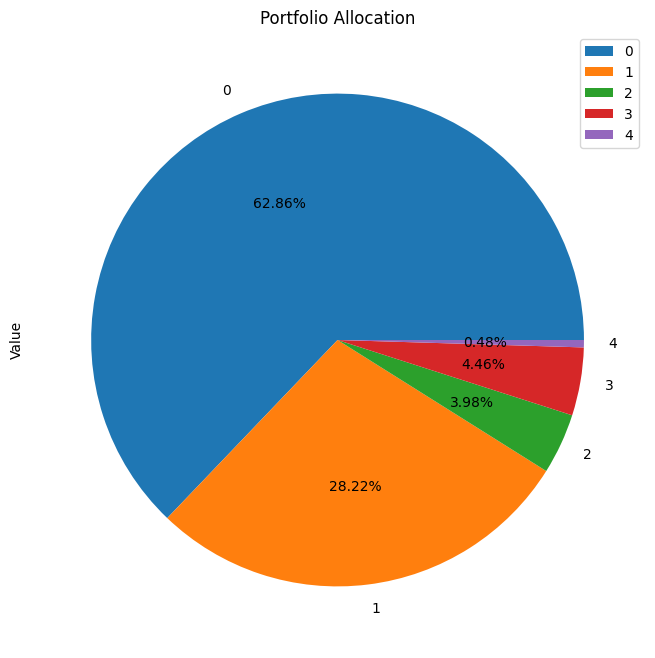

In [25]:
# Trying to make a PIE chart that shows the weights of the portfolio and the stock symbol


stock_shares = portfolio_df['Number of Shares'].sum()
#each_stock_value = portfolio_df['Current Price' * 'Number of Shares'].round(2)

each_stock_value = (portfolio_df['Current Price'] * portfolio_df['Number of Shares']).round(2)


percentage_of_portfolio = ((each_stock_value / total_portfolio_value) * 100).round(2)

portfolio_summary = pd.concat([each_stock_value, percentage_of_portfolio], axis=1)
portfolio_summary.columns = ['Value', 'Percentage']
portfolio_summary.plot.pie(y='Value', 
                           autopct='%1.2f%%', 
                           title="Portfolio Allocation", 
                           figsize=(8, 8))


plt.legend(loc='upper right')